In [212]:
# dataframes
import pandas as pd
# computation
import numpy as np
# visualization
import matplotlib.pyplot as plt


In [213]:
dataset = pd.read_csv('full all label and feature.csv')
dataset.columns


Index(['Unnamed: 0', 'Date', 'SNP500_High', 'SNP500_Low', 'Bitcoin_High',
       'Bitcoin_Low', 'Oil_High', 'Oil_Low', 'Gold_High', 'Gold_Low',
       'EURO_To_USD_Rate', 'Interest'],
      dtype='object')

In [214]:
temp = dataset['Date']
dataset = dataset.drop(columns=['Unnamed: 0', 'Date'])

In [215]:
dataset

,SNP500_High,SNP500_Low,Bitcoin_High,Bitcoin_Low,Oil_High,Oil_Low,Gold_High,Gold_Low,EURO_To_USD_Rate,Interest
0,76.17,73.84,16481.4,16060.8,76.17,73.84,1753.85,1745.80,1.0472,1.41
1,76.35,75.84,16595.4,16414.6,76.35,75.84,1770.60,1750.10,1.0367,1.41
2,79.89,76.23,16686.3,16387.9,79.89,76.23,1761.20,1745.90,1.0402,1.41
3,78.19,76.92,16611.8,16360.9,78.19,76.92,1758.95,1752.55,1.0408,1.41
4,81.95,76.83,16785.6,16472.0,81.95,76.83,1754.90,1719.00,1.0418,1.41
...,...,...,...,...,...,...,...,...,...,...
2039,49.65,47.73,1260.2,1119.0,49.65,47.73,1216.40,1206.90,1.1793,0.13
2040,49.31,46.83,1256.9,1236.4,49.31,46.83,1217.50,1210.00,1.1839,0.13
2041,50.37,47.55,1255.5,1218.4,50.37,47.55,1222.00,1206.00,1.1889,0.13
2042,52.73,49.68,1245.6,1205.6,52.73,49.68,1205.20,1189.10,1.1934,0.13


In [216]:
x = dataset.drop(columns=['SNP500_Low', 'SNP500_High'])
X = [list(x.iloc[i]) for i in range(len(x.index))]
y = list(dataset['SNP500_High'])

In [217]:
X[1]

[16595.4, 16414.6, 76.35, 75.84, 1770.6, 1750.1, 1.0367, 1.41]

In [218]:
y[1]

76.35

In [219]:
# make sure to import all of our modules
# sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [220]:
#define our polynomial model, with whatever degree we want
degree=3

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(X_train)

# should be in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {X_train[0]}\nMapped to {poly_x_values[0]}')

# [1, a=5, b=2940, a^2=25, 5*2940=14700, b^2=8643600]

# let's fit the model
poly_model.fit(poly_x_values, y_train)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_train)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_train, y_pred, squared=False)

initial values [9456.7, 9135.4, 42.22, 41.04, 1348.4, 1335.1, 1.1075, 0.39]
Mapped to [1.00000000e+00 9.45670000e+03 9.13540000e+03 4.22200000e+01
 4.10400000e+01 1.34840000e+03 1.33510000e+03 1.10750000e+00
 3.90000000e-01 8.94291749e+07 8.63907372e+07 3.99261874e+05
 3.88102968e+05 1.27514143e+07 1.26256402e+07 1.04732953e+04
 3.68811300e+03 8.34555332e+07 3.85696588e+05 3.74916816e+05
 1.23181734e+07 1.21966725e+07 1.01174555e+04 3.56280600e+03
 1.78252840e+03 1.73270880e+03 5.69294480e+04 5.63679220e+04
 4.67586500e+01 1.64658000e+01 1.68428160e+03 5.53383360e+04
 5.47925040e+04 4.54518000e+01 1.60056000e+01 1.81818256e+06
 1.80024884e+06 1.49335300e+03 5.25876000e+02 1.78249201e+06
 1.47862325e+03 5.20689000e+02 1.22655625e+00 4.31925000e-01
 1.52100000e-01 8.45704878e+11 8.16971284e+11 3.77569976e+09
 3.67017334e+09 1.20586299e+11 1.19396891e+11 9.90428112e+07
 3.48773782e+07 7.89213940e+11 3.64741692e+09 3.54547585e+09
 1.16489270e+11 1.15340273e+11 9.56777414e+07 3.36923875e+07

0.1977988976045641

In [221]:

poly_x_values_test = poly_model.fit_transform(X_test)

y_pred = regression_model.predict(poly_x_values_test)
index = [i for i in range(len(y_pred))]

In [222]:
regression_model.predict(poly_x_values_test[2040].reshape(1,-1))

IndexError: index 2040 is out of bounds for axis 0 with size 675

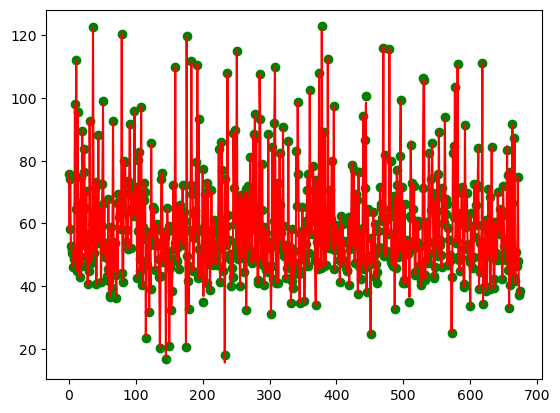

In [ ]:
plt.scatter(index, y_test, color="green")
plt.plot(index, y_pred, color="red") 

In [ ]:
y_test

[75.75,
 58.08,
 74.14,
 52.95,
 51.48,
 50.53,
 46.09,
 48.73,
 49.33,
 97.96,
 64.5,
 112.22,
 44.76,
 95.4,
 66.39,
 49.95,
 43.06,
 54.05,
 74.76,
 46.38,
 89.31,
 54.84,
 76.47,
 83.74,
 64.89,
 49.2,
 70.22,
 52.57,
 40.77,
 47.71,
 44.87,
 92.73,
 56.76,
 47.35,
 48.25,
 59.85,
 122.72,
 63.57,
 50.63,
 71.26,
 73.06,
 40.7,
 56.57,
 60.95,
 88.17,
 53.79,
 56.58,
 64.79,
 41.24,
 59.27,
 72.43,
 99.1,
 50.93,
 66.51,
 49.17,
 53.83,
 52.62,
 43.29,
 45.64,
 67.88,
 41.82,
 37.26,
 36.6,
 58.72,
 39.59,
 53.94,
 92.73,
 45.01,
 54.24,
 53.92,
 43.57,
 36.35,
 66.55,
 44.05,
 69.31,
 62.21,
 63.3,
 66.42,
 58.22,
 120.46,
 44.11,
 41.33,
 63.34,
 79.78,
 79.45,
 69.44,
 54.22,
 57.99,
 52.0,
 73.5,
 72.6,
 91.68,
 71.96,
 52.34,
 69.2,
 63.81,
 65.13,
 62.27,
 95.76,
 69.05,
 66.28,
 71.63,
 42.75,
 57.53,
 80.24,
 82.67,
 44.97,
 48.77,
 97.0,
 54.94,
 40.54,
 58.87,
 67.41,
 72.99,
 69.96,
 23.44,
 47.21,
 46.74,
 56.78,
 57.19,
 31.77,
 53.23,
 39.25,
 85.71,
 56.99,
 55.87,
 